<a href="https://colab.research.google.com/github/jihyunjeongme/data-science/blob/master/%5B2%EC%9E%A5_%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5%5D_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://image.yes24.com/Goods/72219991/800x0" width=300 height=400>

## (개정판)파이썬 라이브러리를 활용한 머신러닝
## 2장-지도 학습


## 2.1 분류와 회귀
### 분류: 미리 정의돈, 가능성 있는 여러 클래스 레이블 중 하나를 예측
  - 이진분류: 딱 두개의 클래스로 분류
    - ex) 예/아니요, 이메일 스팸분류
  - 다중분류: 셋 이상의 클래스로 분류
    - ex) 붓꽃분류
### 회귀: 연속적인 숫자, 또는 부동소수점수(수학 용어로는 실수)를 예측 하는 것
  - 예시) 어떤 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측하는 것
  - 옥수수 농장에서 전년도 수확량과 날씨, 고용 인원수 등으로 올해 수확량을 예측하는 예도 회귀문제
  - 예상 출력 값 사이에 연속성이 있다면 회귀 문제.

  


## 2.2 일반화, 과대적합, 과소적합
- 일반화: 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련세트에서 테스트 세트로 일반화 되었다고 함.
- 과대적합: 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되거 어려울 때 일어남
- 과소적합: 모델이 너무 간단해, 데이터의 면면과 다양성을 잡아내지 못할 것이고 훈련 세트에도 잘 맞지 않는 경우.
- 모델을 복잡하게 할수록 훈련 데이터에 대해서는 더 정호가하게 할 수 있으나 너무 복잡해지면 훈련 세트의 각 데이터 포인트에 너무 민감해져 새로운 데이터에 잘 일반화되지 못함.
- 우리가 찾으려는 모델은 일반화 성능이 최대가 되는 최적점에 있는 모델.


## 2.2.1 모델 복잡도와 데이터셋 크기의 관계

## 2.3 지도 학습 알고리즘
### 2.3.1 예제에 사용할 데이터셋
- 두 개의 특성을 가진 forge 데이터셋: 인위적으로 만든 이진 분류 데이터셋

In [4]:
!pip install mglearn

import mglearn
# 데이터셋 만듬
X, y = mglearn.datasets.make_forge()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 설치
import matplotlib.font_manager as fm  # 폰트 관련 용도


# 나눔 고딕 인스톨
!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고
# fm._rebuild() 를 해줘야 system 에 추가 설치된 폰트를 matplotilb.font_manager 가 알아차리는 것으로 보인다.
fm._rebuild()

NanumMyeongjo


X.shape: (26, 2)


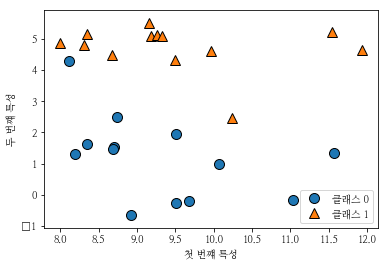

In [6]:
# 산점도를 그립니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번쨰 특성")

plt.ylabel("두 번쨰 특성")
print("X.shape:", X.shape)

Text(0, 0.5, '타깃')

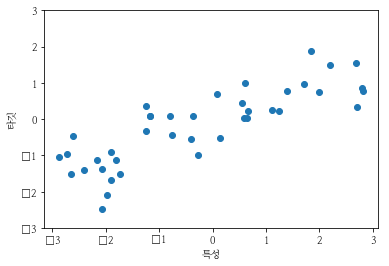

In [7]:
# X.shape 값에서 알 수 있듯이 이 데이터셋은 데이터 포인트 26개와 특성 2개를 가집니다.
# 회귀 알고리즘 설명에는 인위적으로 만든 wave 데이터셋을 사용하겠습니다.

# wave 데이터셋은 입력 특성 하나와 모델링할 타깃 변수(또는 응답)을 가집니다.

# 특성을 x축에 놓고 회귀의 타깃(출력)을 y축에 놓았습니다.
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [0]:
# scikit-learn에 들어 있는 실제 데이터셋도 두 개를 하겠습니다.
# 1. 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암 데이터셋(줄여서 cancer)
#  - 각 종양은 양성과 악성으로 레이블 되어 있고, 조직 데이터를 기반으로 종양이 악성인지를 예측 할 수 있도록 학습하는 것이 과제

In [9]:
# sciket-learn에 있는 load_breast_cancer 함수를 사용하여 불러올 수 있습니다.

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [10]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [0]:
# 이 데이터 셋은 569개의 데이터 포인트를 가지고 있고 특성은 30개 입니다.

In [12]:
import numpy as np
print("클래스별 샘플 개수:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [0]:
# 569개의 데이터 중 212개는 악성이고 357개는 양성

In [14]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [15]:
# 데이터에 관한 더 자세한 정보
print("데이터에 대한 자세한 정보:\n", cancer.DESCR)

데이터에 대한 자세한 정보:
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 

In [16]:
# 회귀 분석용 실제 데이터셋으로는 보스턴 주택가격 데이터 셋
# 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해 1970년대 보스턴 주변의 
# 주택 평균 가격을 예측하는 것.
# 데이터 포인트 506개와 특성 13개

from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:", boston.data.shape)

# 데이터의 자세한 정보는 boston 객체의 DESCR 속성에서 더 자세한 정보를 확인 할 수 있음.

데이터의 형태: (506, 13)


In [17]:
# 유도된 데이터셋은 load_extended_boston 함수를 사용하여 불러들일 수 있음.

X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


In [0]:
# 13개의 원래 특성에 13개에서 2개씩 (중복을 포함해) 짝지은 91개의 특성을 더해 총 104개가 됩니다.

## 2.3.2 k-최급접 이웃
- k-NN(k-Nearest Neighbors)알고리즘은 가장 간단한 머신러닝 알고리즘, 
- 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부
- 새로운 데이터 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터넷에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾습니다.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


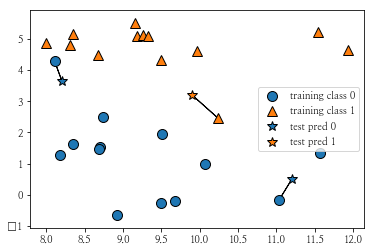

In [19]:
# k-최근접 이웃 분류
# 가장 간단한 k-NN 알고리즘은 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용합니다.
# 단순히 이 훈련 데이터 포인트의 추력이 예측 됩니다.

# forge 데이터셋을 분류
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [0]:
# 이 그름에서는 데이터 포인트 3개를 추가했습니다(별 모양으로 표시)
# 그리고 추가한 각 데이터 포인트에서 가장 가까운 훈련 데이터 포인트를 연결했습니다.
# 1-최근접 이웃 알고리즘의 예측은 이 데이터 포인트의 레이블이 됩니다(같은 색으로 연결함)

# 가장 가까운 이웃 하나가 아니라 임의의 k개를 선택할 수 있음.
# 그래서 k-최근접 이웃 알고리즘이라 부름.

# 둘 이상의 이웃을 선택할 떄는 레이블을 정하기 위해 투표를 합니다.
# k-최근접 이웃 중 다수의 클래스가 레이블이 됩니다. 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


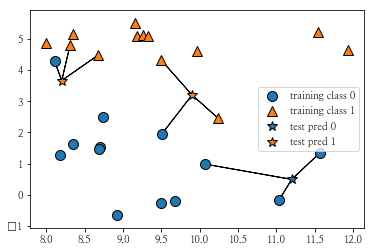

In [21]:
# 다음은 세 개의 최근접 이웃을 사용하는 예

mglearn.plots.plot_knn_classification(n_neighbors=3)

In [0]:
# 여기에서도 예측은 연결된 데이터 포인트의 색으로 나탑니다.

In [23]:
# 이제 scikit-learn을 사용해서 k-최근접 이웃 알고리즘을 어떻게 적용하는지 살펴보겠습니다.
# 먼저 1장에서 한 것처럼 일반화 성능을 평가할 수 있도록 데이터를 훈련 세트와 테스트 세트로 나눕니다.

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
# KNeighborsClassfier를 임포트하고 객체를 만듭니다.
# 이떄 이웃의 수 같은 매개 변수들을 지정합니다. 여기서는 이웃의 수를 3으로 지정합니다.

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [25]:
# 이제 훈련 세트를 사용하여 분류 모델을 학습시킵니다.
# KNeighborsClassifier에서의 학습은 예측할 떄 이웃을 찾을 수 있도록 데이터를 저장하는 것
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [26]:
# 테스트 데이터에 대해 predict 메서드를 호출해서 예측합니다.
# 테스트 세트의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산한 다음 가장 많은 클래스를 찾습니다.

print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [27]:
# 모델이 얼마나 잘 일반화 되었는지 평가하기 위해 score 메서드에 테스트 데이터와 테스트 레이블을 넣어 호출

print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test,y_test)))

테스트 세트 정확도: 0.86


In [0]:
# 이 모델의 정확도는 86%로 나옴.
# 즉, 모델이 테스트 데이터셋에 있는 샘플 중 86%를 정확히 예측

## KNeighborsClassifier 분석

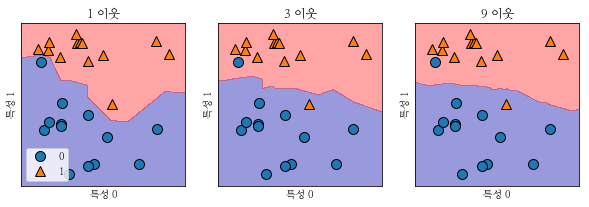

In [29]:
# 다음코드는 이웃이 하나, 셋, 아홉 개일 떄의 결정 경계를 보여줌
fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  # fit 메소드는 self 오프젝트를 리턴합니다.
  # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다.
  
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
  ax.set_title("{} 이웃".format(n_neighbors))
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")
axes[0].legend(loc=3)


In [0]:
# n_neighbors 값이 각기 다른 최근접 이웃 모델이 만든 결정 경계

# 하나선택: 결정 경계가 훈련 데이터 가깝게 따라감
# 이웃의 수를 늘릴수록 결정 경계는 더 부드러워짐 -> 부드러운 경계는 더 단순한 모델을 의미
# 이웃을 적게 사용하면 모델의 복잡도가 높아지고, 많이 사용하면 복잡도는 낮아짐.

### 모델의 복잡도와 일반화 사이의 관계를 입증
- 유방암 데이터셋을 사용
- 훈련 세트, 테스트 세트로 나눈 후 이웃의 수를 달리 하여 훈련 세트와 테스트 세트의 성능을 평가

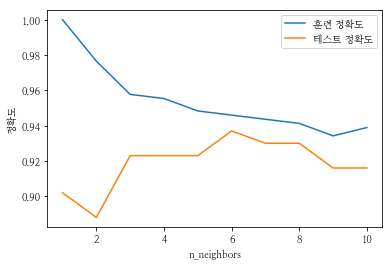

In [31]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
  cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neightbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  
  # 훈련 세트 정확도 저장
  training_accuracy.append(clf.score(X_train, y_train))
  
  # 일반화 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))
  
  
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()


In [0]:
# 정확도가 가장 좋을 떄는 중간 정도인 6개를 사용한 경우

### k-최근접 이웃 회귀
- k-최근접 이웃 알고리즘은 회귀 분석에도 씀.
- wave 데이터셋을 이용해서 이웃이 하나인 최근접 이웃을 사용
- x 축에 세 개의 테스트 데이터를 흐린 별 모양으로 표시
- 최근접 이웃을 한 개만 이용할 때 예측은 그냥 가장 가까운 이웃의 타깃값
- 이 예측은 진한 별 모양으로 표시

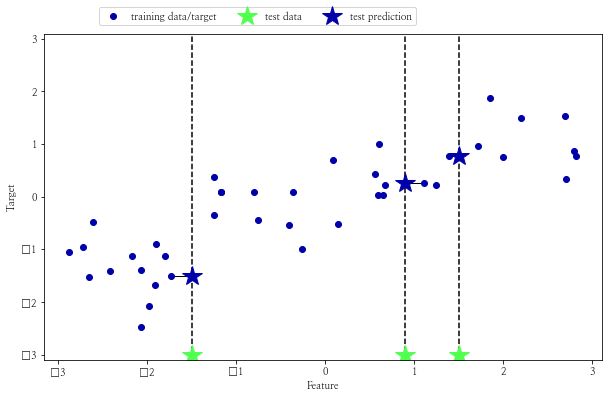

In [33]:
# wave 데이터셋에 대한 1-최근접 이웃 회귀 모델의 예측

mglearn.plots.plot_knn_regression(n_neighbors=1)

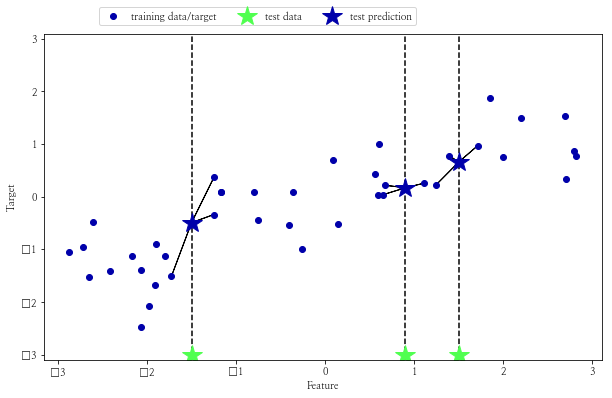

In [34]:
# 이웃을 둘 이상 사용하여 회귀 분석을 할 수 있음.
# 여러 개의 최근접 이웃을 사용할 땐 이웃 간의 평균이 예측

# wave 데이터셋에 대한 3-최근접 이웃 회귀 모델의 예측
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [35]:
# scikit-learn에서 회귀를 위한 k-최근접 이웃 알고리즘은 KNeighborsRegressor에 구현 되어 있습니다.
# 사용법은 KNeighborsClassifier와 비슷

from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)

# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [36]:
# 그리고 테스트 세트에 대해 예측을 합니다.

print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [37]:
# 역시 score 메서드를 사용해 모델을 평가할 수 있습니다.
# 이 메서드는 회귀일 떈 R^2 값을 반환합니다. 
# 결정 계수라고 하는 R^2 같은 회귀 모델에서 예측의 접합도를 측정한으로 보통 0과 1사이의 값
# 1은 예측이 완벽한 경우이고, 0은 훈련 세트의 출력값이 y_train의 평균으로만 예측하는 모델의 경우 입니다.
# R^2은 음수가 될 소 도 있습니다. 이 떄는 예측과 타깃이 상반된 경향을 가지는 경우

print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))


테스트 세트 R^2: 0.83


In [0]:
# 우리가 얻은 점수는 0.83이라 모델이 비교적 잘 들어 맞음.


### KNeighborsRegressor 분석
- 1차원 데이터셋에 대해 가능한 모든 특성 값을 만들어 예측해볼 수 있음.
- 이를 위해 x 축을 따라 많은 포인트를 생성해 테스트 데이터셋을 만듬.

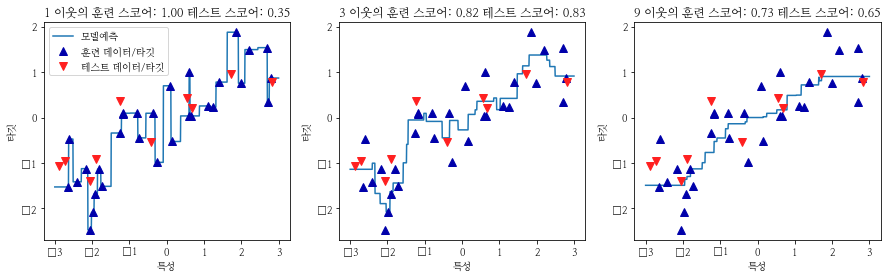

In [38]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

# -3과 3 사이에 1,000개의 데이터 포인트를 만듭니다

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,9], axes):
  
  # 1, 3, 9 이웃을 사용한 예측을 합니다.
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
#   ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), marketsize=8)
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
  
  ax.set_title(
    "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
      n_neighbors, reg.score(X_train, y_train),
      reg.score(X_test, y_test)))
  ax.set_xlabel("특성")
  ax.set_ylabel("타깃")
axes[0].legend(["모델예측", "훈련 데이터/타깃",
                "테스트 데이터/타깃"], loc="best")

In [0]:
# n_neighbors 값에 따라 최근접 이웃 회귀로 만들어진 예측 비교

# 이웃을 하나만 사용할 떄는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이
# 훈련 데이터 포인트를 모두 지나갑니다.

## 장단점과 매개변수
- KNeighbors 분류기에 중요한 매개변수는 두 개. 거리를 쟤는 방법과 이웃의 수
- 실제로 이웃의 수는 3개나 5개 정도로 적을 떄 잘 작동하지만, 이 매개변수는 잘 조정해야 함.
- 기본적으로 유클리디안 거릴 방식을 사용해서 거리를 잼

- 장점
1. k-NN은 이해하기 매우 쉬운 모델, 많이 조정하지 않아도 자주 좋은 성능을 발휘
2. 더 복잡한 알고리즘을 적용해보기 전에 시도해볼 수 있는 좋은 시작점.

- 단점
1. 훈련 세트가 매우 크면(특성의 수나 샘플의 수가 클 경우) 예측이 느려짐.
2. 수백 개 이상의 많은 특성을 가진 데이터셋에는 잘 동작하지 않으며, 특성 값 대부분이 0인(희소한) 데이터셋과는 특히 잘 작동하지 않음.

- k-NN 알고리즘을 사용할 떈 데이터를 전처리하는 과정이 중요.

- 요약: k-최근접 이웃 알고리즘이 이해하긴 쉽지만, 예측이 느리고 많은 특성을 처리하는 능력이 부족해 현업에서는 잘 쓰지 않음. 이런 단점이 없는 알고리즘이 다음에 설명할 선형 모델

## 2.3.3 선형 모델
- 100여 년 전에 개발, 현재도 널리 쓰임
- 입력 특성에 대한 `선형 함수`를 만들어 예측을 수행

w[0]: 0.393906  b: -0.031804


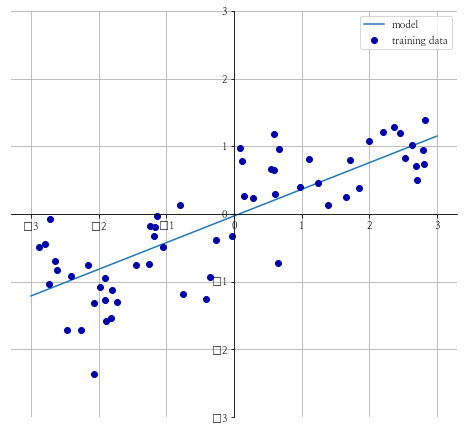

In [40]:
# 1차원 wave 데이터셋으로 학습

mglearn.plots.plot_linear_regression_wave()

# wave 데이터셋에 대한 선형 모델의 예측

In [0]:
# 기울기는 대략 0.4
# 특성 1개: 직선 / 2개: 평면 / 더 높은 차원: 초평면

## 선형 회귀(최소제곱법)
- 선형 회귀는 예측과 훈련 세트에 있는 타깃y 사이의 `평균제곱오차`를 최소화하는 파라미터 w와 b를 찾습니다.
- 평균제곱오차는 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것.
- 선형 회귀는 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도를 제어할 방법도 없습니다.

In [0]:
# 선형 모델을 만드는 코드

from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [43]:
# 기울기 파라미터(w)는 가중치 또는 계수
# lr 객체의 coef_속성에 저장되어 있고 편향 또는 절편 파라미터(b)는 intercept_ 속성에 저장되어 있음.

print("lr.coef:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef: [0.39390555]
lr.intercept_: -0.031804343026759746


In [0]:
# NOTE: scikit-learn은 훈련 데이터에서 유도된 속성은 항상 끝에 밑줄을 붙임. 
# 사용자가 지정한 매개변수와 구분하기 위해

In [45]:
# 훈련 세트와 테스트 세트의 성능을 확인

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))


훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [0]:
# R^2 값이 0.66인 것은 좋은 결과는 아님
# 하지만 훈련 세트와 테스트 세틔 점수가 매우 비슷함 -> 이는 과대적합이 아니라 과소적합인 상태

In [0]:
# LinearRegression 모델이 보스턴 주택가격 데이터셋 같은 복잡한 데이터셋에서
# 어떻게 동작하는지 살펴보겠음.

# 이 데이터셋에서는 샘플이 506개, 특성은 유도된 것을 합쳐 104개

In [0]:
# 데이터셋을 읽어 들이고 훈련 세트와 테스트 세트로 나눔

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [49]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))


훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


In [0]:
# 훈련 데이터와 테스트 데이터 사이의이런 성능 차이는 모델이 과대적합되었다는 확실한 신호
# 복잡도를 제어할 수 있는 모델을 사용해야 합니다.
# 기본 선형 회귀 방식 대신 가장 널리 쓰이는 모델은 다음에 볼 리지 회귀

## 리지(Ridge) 회귀
- 리지(Ridge)도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 것과 같은 예측 함수를 사용.
- 하지만 리지 회귀에서의 가중치(w)선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있음.
- 가중치의 절댓값을 가능한 한 작게 만드는 것.
- w의 모든 원소가 0에 가깝게 되길 원함.
- 모든 특성이 출력에 주는 영향을 최소한으로 만듭니다(기울기를 작게 만듭니다)
- 이런 제약을 `규제`라고 함. 
- 규제란 과대적합이 되지 않도록 모델을 강제로 제한 한다는 의미
- 리지 회귀에 사용하는 규제 방식을 L2 규제

In [51]:
# 리지 회귀가 확장된 보스턴 주택가격 데이터셋에 어떻게 적용되는지 살펴보겠음.

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [0]:
# 결과를 보니 훈련 세트에서의 점수는 LinearRegression보다 낮지만 테스트 세트에 대한 점수는 더 높습니다.
# 기대한 대로 입니다.

# 선형회귀는 이 데이터셋에 과대적합되지만 Ridge는 덜 자유로운 모델이기 때문에 과대적합이 적어짐.
# 관심있는 것은 테스트 세트에 대한 성능이기 떄문에 LinearRegression보다 Ridge 모델을 선택해야 합니다.
# 사용자는 alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있습니다.
# 앞의 예제에서는 매개변수의 기본값인 alpha=1.0을 사용했습니다.

In [53]:
# 리지 회귀 alpha값 10

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [0]:
# alpha 값을 줄이면 계수에 대한 제약이 줄으면서 점수가 바뀜
# 아주 작은 alpha 값은 계수(alpha=0.00001)를 거의 제한하지 않으므로 LinearRegression으로 만든 모델과 거의 같아짐.

In [55]:
# 리지 회귀 alpha값 0.1

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


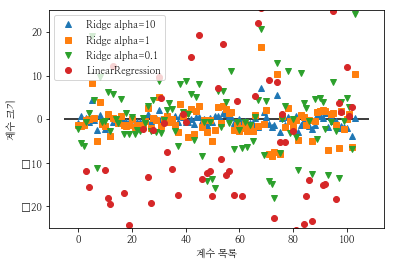

In [56]:
# 이 코드에서는 alpha=0.1이 꽤 좋은 성능을 낸것 같음.

# 높은 alpha 값은 제약이 더 많은 모델이므로 작은 alpha 값일 때 보다 coef_의 절댓값 크기가 작을 것 이라고 예상

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.ylim(-25, 25)
plt.legend()

# 선형 회귀와 몇 가지 alpha 값을 가진 리지 회귀의 계수 크기 비교

In [0]:
# x 축은 coef_의 원소를 위치대로 나열
# y 축은 각 계수의 수치를 나타냄.

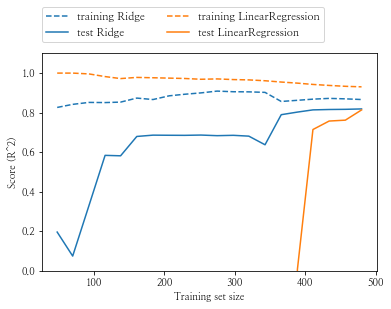

In [58]:
# 규제를 이해하는 방법은 alpha 값을 고정하고 훈련 데이터의 크기를 변화시켜 보는 것
# 보스턴 주택가격 데이터셋에서 여러 가지로 크기로 샘플링하여 
# LinearRegression과 Ridge(alpha=1)을 적용한 것
# 데이터셋의 크그에 따른 모델의 성능 변화를 나타낸 그래프를 학습 곡선

mglearn.plots.plot_ridge_n_samples()

In [0]:
# 예상대로 모든 데이터셋에 대해 리지와 선형 회귀 모두 훈련 세트의 점수가 테스트 세트의 점수보다 높음.
# 여기서 배울 수 있는 것은 데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아질 것.
# 또 하나의 흥미로운 점, 선형 회귀의 훈련 데이터 성능이 감소한다는 것. 
# 이는 데이터가 많아 질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 떄문

### 라쏘(Lasso)
- 선형회귀에 규제를 적용하는 데 Ridge의 대안으로 Lasso가 있음.
- 라쏘도 리지 회귀에서와 같이 계수를 0에 가깝게 만들려고 함.
- 하지만, 방식이 조금 다르며 이를 L1 규제라고 함.
- L1 규제의 결과로 라쏘를 사용할 떄 어떤 계수는 정말 0이 됩니다.
- 이말은 모델에서 완전히 제외되는 특성이 생긴다.
- 어떻게 보면 특성 선택이 자동으로 이뤄진다고 볼 수 있음.

In [60]:
# 확장된 보스턴 주택가격 데이터셋에 라쏘를 적용

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ !=0))


훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [61]:
# 결과에서 볼 수 있듯이 Lasso는 훈련 세트와 테스트 세트 모두에서 결과가 좋지 않음.
# 이는 과소적합이며 104개의 특성 중 4개만 사용 한 것을 볼 수 있음.

# 과속적합을 줄이기 위해 alpha 값을 줄여보겠습니다.
# 이렇게 하려면 max_iter(반복 실행하는 최대 횟수)의 기본값을 늘려야 합니다.

# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ !=0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [62]:
# alpha 값을 낮추면 모델의 복잡도는 증가하여 훈련 세트와 테스트 세트에서의 성능이 좋아집니다.
# 성능은 Ridge보다 조금 나은데 사용된 특성은 104개중 33개뿐이서, 아마도 모델을 분석하기가 조금 더 쉬움.
# 그러나 alpha 값을 너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해집니다.

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ !=0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


- 실제로 Ridge vs Lasso 모델중 보통은 리지 회귀를 선호합니다. 하지만 특성이 많고 그중 일부분만 중요하다면 Lasso가 더 좋은 선택일 수 있습니다.
- 또한 분석하기 쉬운 모델을 원한다면 Lasso가 입력 특성 중 사용하므로 쉽게 해석할 수 잇는 모델을 만들어줄 것 입니다.
- scikit-learn은 Lasso와 Ridge의 패널티를 결합한 ElasticNet도 제공함.
- 실제로 이 조합은 최상의 성능을 내지만 L1규제와 L2규제를 위한 매개변수 두 개를 조정해야 합니다.



### 분류용 선형 모델
- 선형 모델은 분류에도 널리사용합니다. 
- 먼저 이진분류를 살펴보겠습니다. 
- 특성들의 가중치 하블 그냥 사용하는 대신 예측한 값을 임계치 0과 비교합니다.
- 함수에서 계산한 값이 0보다 작으면 클래스를 -1이라고 예측하고 0보다 크면 +1이라고 예측합니다.
- 이 규칙은 분류에 쓰이는 모든 선형모델에서 동일합니다.

#### 선형 모델을 학습시키는 알고리즘은 다양한대, 다음의 두 방법으로 구분할 수 있습니다.
- 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
- 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지
- 가장 널리 알려진 두 개의 선형 분류 알고리즘은 '구현 된 로지스틱회귀'와 '서포트 벡터 머신'

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


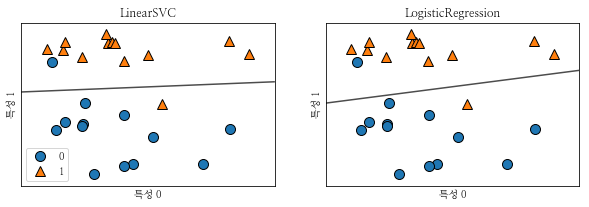

In [63]:
# forge 데이터셋을 사용하여 LogisticRegression과 LinearSVC 모델을 만들고 
# 이 선형 모델들이 만들어낸 결정 경계를 그림으로 나타내보겠습니다.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                  ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
  ax.set_title(clf.__class__.__name__)
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")
axes[0].legend()

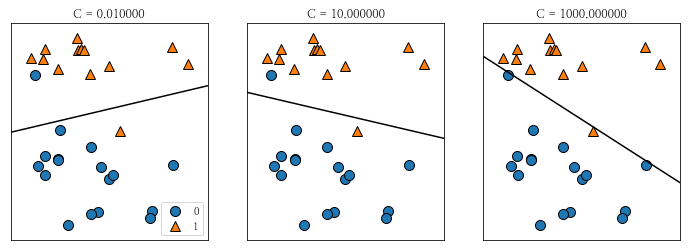

In [64]:
# LogisticRegression과 LinearSVC 에서 규제의 강도를 결정하는 매개변수는 C입니다.
# C의 값이 높아지면 규제가 감소합니다. 다시 말해 매개변수로 높은 C 값을 지정하면 
# LogisticRegression과 linearSVC는 훈련세트에 가능한 최대로 맞추려 하고, 
# 반면에 C값을 낮추면 모델은 계수 벡터(w)가 0에 가까워지도록 만듬.

mglearn.plots.plot_linear_svc_regularization()

In [0]:
# forge 데이터셋에 각기 다른 C 값으로 만든 선형 SVM 모델의 결정 경계
# 오른쪽은 과대적합된 것 같음.

In [66]:
# 유방함 데이터셋을 사용해서 LogisticRegression을 좀 더 자세히 분석

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
  cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.958


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [67]:
# 기본값 C=1이 훈련 세트와 테스트 세트 양쪽에 95% 정확도로 꽤 훌룡한 성능을 내고 있습니다.
# 하지만 훈련 세트와 테스트 세트의 성능이 매우 비슷하므로 과소적합인 것 같습니다.
# 모델의 제약을 더 풀어주기 위해 C를 증가시켜보겠습니다.

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.967
테스트 세트 점수: 0.965


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# C=100을 사용하니 훈련 세트의 정확도가 높아졌고 테스트 세트의 정확도도 조금 증가
# 이는 복잡도가 높은 모델일수록 성능이 좋음을 말해줌.

In [69]:
# 규제를 더 강하게 하기 위해 기본값(C=1)이 아니라 C=0.01을 사용하면 어떻게 되는지 살펴봄

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


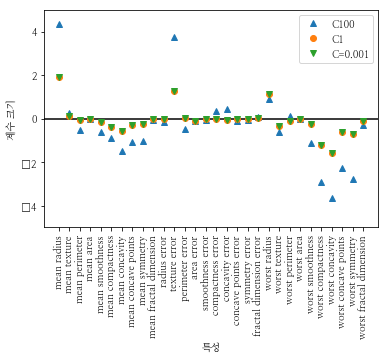

In [71]:
# 규제 매개변수 C 설정을 세 가지로 다르게 하여 학습시킨 모델의 계수

plt.plot(logreg100.coef_.T, '^', label="C100")
plt.plot(logreg.coef_.T, 'o', label="C1")
plt.plot(logreg.coef_.T, 'v', label='C=0.001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001인 l1 로지스틱 회귀의 테스트 정확도: 0.92


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.98


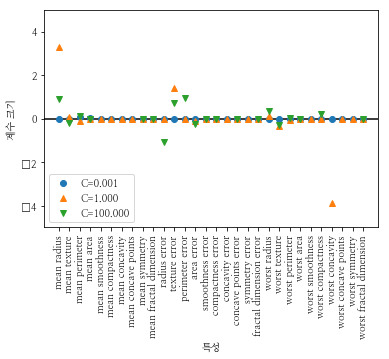

In [79]:

for C, marker in zip([0.001, 1, 100], ['o','^','v']):
  lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
  print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
      C, lr_l1.score(X_train, y_train)))
  print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
      C, lr_l1.score(X_test, y_test)))
  plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
  
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

In [0]:
# 이진 분류에서의 선형 모델과 회귀에서의 선형 모델 사이에는 유사점이 많음.
# 회귀에서처럼, 모델들의 주요 차이는 규제에서 모든 특성을 이용할지 일부 특성만을 사용할지 결정하는 penalty 매개변수